# **6. 다양한 머신러닝 기법들**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### **6.12 다항 특징 변환을 통한 비선형 서포트 벡터 머신의 구현**

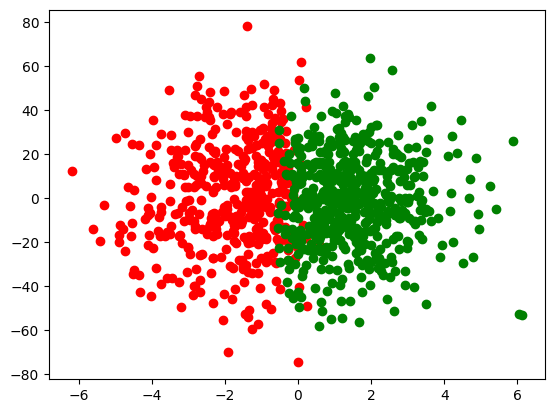

In [1]:
import pandas as pd
import numpy as np
data_loc = 'https://github.com/dknife/ML2nd/raw/main/data/'
df = pd.read_csv(data_loc + 'two_classes.csv')

df_positive = df[df['y']>0]     # y가 1인 데이터만 추출
df_negative = df[df['y']==0]    # y가 0인 데이터만 추출

import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

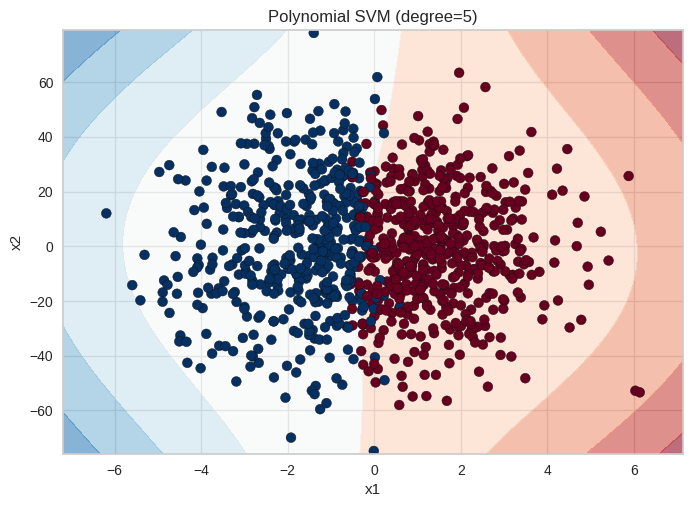

In [5]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# 데이터
X = df[['x1', 'x2']]
y = df['y']

# 모델 (degree=3 다항 SVM)
model = Pipeline([
    ("scaler", StandardScaler()),
    ("poly",   PolynomialFeatures(degree=3)),
    ("svm",    LinearSVC(C=0.01, loss="hinge", max_iter=10000))
])
model.fit(X, y)

# 결정 경계 그리기
DecisionBoundaryDisplay.from_estimator(model, X, cmap="RdBu", alpha=0.6)
plt.scatter(X['x1'], X['x2'], c=y, cmap="RdBu", edgecolor='k', s=50)
plt.title("Polynomial SVM (degree=5)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()